**Latar Belakang**

- COVID-19 merupakan penyakit yang menjadi pandemi secara global.
- Untuk menangani penyebaran COVID-19, pemerintah membentuk gugus tugas (task force unit).
- Salah satu upaya yang dilakukan pemerintah adalah mengumpulkan dan menyediakan data penyebaran COVID-19.

**Rumusan Masalah**
- Bagaimana pola kasus harian positif COVID-19 di Jawa Timur?
- Bagaimana pola kasus sembuh di Jawa Timur?
- Bagaimana pola kasus meninggal di Jawa Timur?
- Kapan kasus pekanan COVID-19 di Jawa Timur mengalami penurunan?
- Bagaimana pola akumulasi aktif COVID-19 di Jawa Timur?

**Data Penyebaran COVID-19 di Indonesia**

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**Status Code**

Beberapa jenis status code yang umumnya dijumpai, antara lain:

200: permintaan sukses dipenuhi;

404: berkas yang diminta tidak dapat ditemukan;

500: akses permintaan ditolak; dan

501: terjadi kesalahan pada server.

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
print(resp)

<Response [200]>


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**Analisis Data**

Pertanyaan:

Kapan tanggal pembaharuan data penambahan kasus?

Berapa jumlah penambahan kasus sembuh?

Berapa jumlah penambahan kasus meninggal?

Berapa jumlah total kasus positif hingga saat ini?

Berapa jumlah total kasus meninggal hingga saat ini?

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
cov_id_raw = resp.json()
cov_id_update = cov_id_raw['update']

print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2022-05-14
Jumlah penambahan kasus sembuh : 416
Jumlah penambahan kasus meninggal : 5
Jumlah total kasus positif hingga saat ini : 6050519
Jumlah total kasus meninggal hingga saat ini : 156453


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**Data Penyebaran COVID-19 di Provinsi Jawa Timur**

In [ ]:
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**Status Code Data COVID-19 di Provinsi Jawa Timur**

In [ ]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
print(resp)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>


**Analisis Data Penyebaran COVID-19 di Provinsi Jawa Timur**

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jatim_tidy.head())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-18           7          1       0
1 2020-03-19           3          0       0
2 2020-03-20           9          0       0
3 2020-03-21           9          1       0
4 2020-03-22          14          0       0


**Grafik Kasus Harian Positif COVID-19 di Jawa Timur**

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

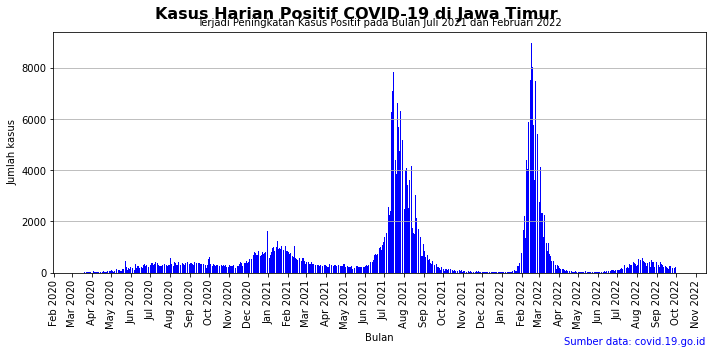

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='kasus_baru', color='blue')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Timur', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi Peningkatan Kasus Positif pada Bulan Juli 2021 dan Februari 2022',
             fontsize=10)
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Grafik Kasus Sembuh di Jawa Timur**

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

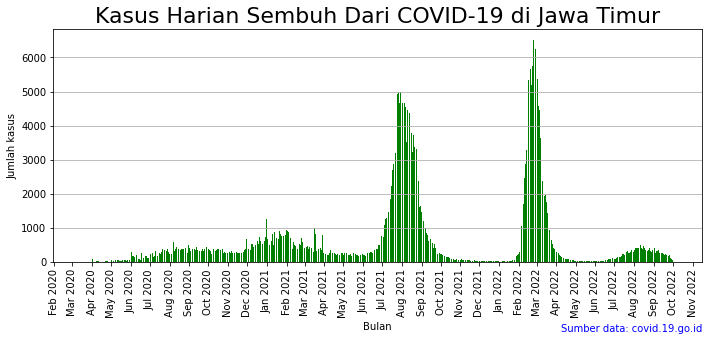

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='sembuh', color='green')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Grafik Jumlah Kasus Meninggal di Jawa Timur**

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

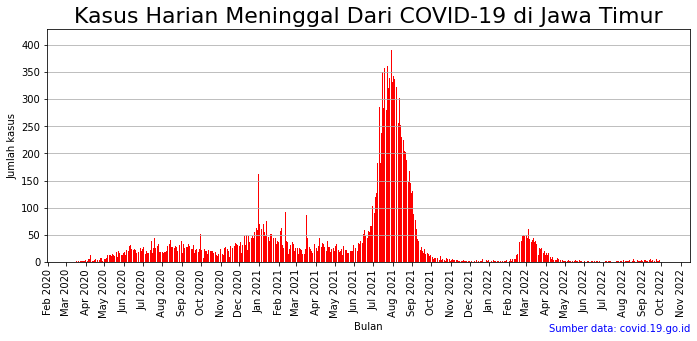

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='meninggal', color='red')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Kasus Pekanan di Jawa Timur**

In [3]:
import numpy as np
import pandas as pd
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')

cov_jatim_pekanan = (cov_jatim_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jatim_pekanan['tahun'] = cov_jatim_pekanan['tanggal'].apply(lambda x: x.year)
cov_jatim_pekanan['pekan_ke'] = cov_jatim_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jatim_pekanan = cov_jatim_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jatim_pekanan['jumlah_pekanlalu'] = cov_jatim_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jatim_pekanan['lebih_baik'] = cov_jatim_pekanan['jumlah'] < cov_jatim_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jatim_pekanan.head(10))

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        12      42                 0       False
1   2020        13      56                42       False
2   2020        14     104                56       False
3   2020        15     221               104       False
4   2020        16     213               221        True
5   2020        17     192               213        True
6   2020        18     332               192       False
7   2020        19     402               332       False
8   2020        20     673               402       False
9   2020        21    1455               673       False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


**Grafik Akumulasi Kasus Positif COVID-19 di Jawa Timur**

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

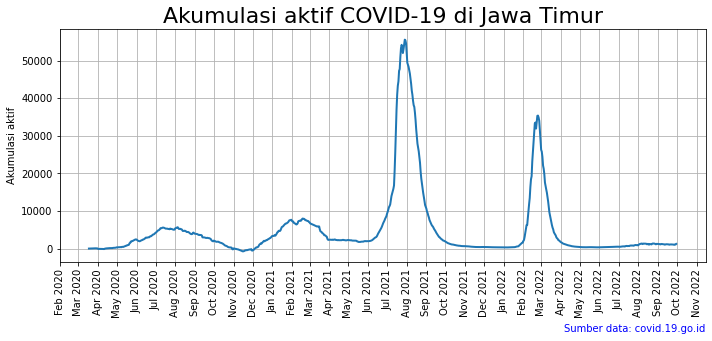

In [4]:
import numpy as np
import pandas as pd
import requests
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json', verify=False)
cov_jatim_raw = resp_jatim.json()
cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])

cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')

cov_jatim_akumulasi = cov_jatim_tidy[['tanggal']].copy()
cov_jatim_akumulasi['akumulasi_aktif'] = (cov_jatim_tidy['kasus_baru'] - cov_jatim_tidy['sembuh'] - cov_jatim_tidy['meninggal']).cumsum()
cov_jatim_akumulasi['akumulasi_sembuh'] = cov_jatim_tidy['sembuh'].cumsum()
cov_jatim_akumulasi['akumulasi_meninggal'] = cov_jatim_tidy['meninggal'].cumsum()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jatim_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

**Kesimpulan**

Dari analisis data yang telah dilakukan, diperoleh kesimpulan bahwa:

- Jumlah kasus harian positif COVID-19 tertinggi di Jawa Timur pada bulan Februari 2022.
- Jumlah kasus sembuh tertinggi di Jawa Timur pada bulan Maret 2022.
- Jumlah kasus meninggal tertinggi di Jawa Timur pada bulan Agustus 2021.
- Penurunan kasus pekanan COVID-19 di Jawa Timur terjadi pada pekan ke-16 dan ke-17 pada tahun 2020.
- Akumulasi aktif COVID-19 di Jawa Timur terjadi pada bulan Agustus 2021.